## Practical Work 3

For this practical work, the trainees will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

##### Please notice that we will apply these algorithm to single variable LR.
##### Only batch variant is required.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that:
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

### Plot X vs. y

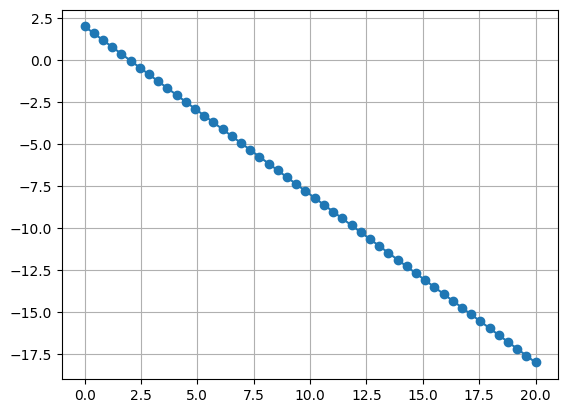

In [4]:
plt.plot(X, y, marker='o')
plt.grid()

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

In [5]:
def plot_loss(loss):
    plt.figure(figsize=(20, 7))
    plt.plot(loss, marker="o")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.grid()


def plot_all_reg(X, y, hypos):
    plt.plot(X, y, marker='o')
    for hypo in hypos:
        plt.plot(X, hypo, color='r')
    plt.grid()
    plt.xlabel("X")
    plt.ylabel("Y_pred")

def plot_best_reg(X, y, hypos):
    plt.plot(X, y, marker='o')
    plt.plot(X, hypos[-1], color='r')
    plt.grid()
    plt.xlabel("X")
    plt.ylabel("Y_pred")

def plot_thetas_vs_loss(thetas, loss):
    thetas_0 = []
    thetas_1 = []
    for x in thetas:
        thetas_0.append(x[0])
        thetas_1.append(x[1])
    fig, (ax1, ax2) = plt.subplots(2, 1)
    fig.set_size_inches(7, 8)
    ax1.plot(thetas_0, loss, marker='o')
    ax1.set_xlabel("Theta 0")
    ax1.set_ylabel("Loss")
    ax1.set_title("Learning Rate = .0005")
    ax1.grid()

    ax2.plot(thetas_1, loss, marker='o')
    ax2.set_xlabel("Theta 1")
    ax2.set_ylabel("Loss")
    ax2.set_title("Learning Rate = .0005")
    ax2.grid()

    plt.tight_layout()

def plot_thetas_0_1_vs_loss(thetas_0, thetas_1, loss):
    fig, (ax1, ax2) = plt.subplots(2, 1)
    fig.set_size_inches(7, 8)
    ax1.plot(thetas_0, loss, marker='o')
    ax1.set_xlabel("Theta 0")
    ax1.set_ylabel("Loss")
    ax1.set_title("Learning Rate = .0005")
    ax1.grid()

    ax2.plot(thetas_1, loss, marker='o')
    ax2.set_xlabel("Theta 1")
    ax2.set_ylabel("Loss")
    ax2.set_title("Learning Rate = .0005")
    ax2.grid()

    # plt.grid()
    plt.tight_layout()

In [6]:
def GD_SingleVar_LR(X, y, alpha, max_iter):
    theta_0 = 0                                                     # Initialization
    theta_1 = 0
    loss = [1]
    thetas_0 = []
    thetas_1 = []
    hypos = []
    m = len(X)

    for i in range(max_iter):
        print('*' * 20 , f'Iteration {i}', '*' * 20, '\n')
        y_hat = theta_0 + theta_1 * X                               # Predictions
        print(f"h(x):{y_hat}\n")

        err_vec = y_hat - y                                         # Error Vector
        j = (1 / (2 * m)) * np.sum(np.square(err_vec))              # Cost Function
        print(f"Error Vector:\n{err_vec}\n\nj = {j}\n")

        #### Track variables
        loss.append(j)
        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        hypos.append(y_hat)

        d_theta_0 = (1 / m) * np.sum(err_vec * 1)                   # Theta 0 gradient
        d_theta_1 = (1 / m) * np.sum(err_vec * X)                   # Theta 1 gradient
        print(f"d_theta_0 : {d_theta_0}")
        print(f"d_theta_1 : {d_theta_1}\n")

        grad_vec = np.array([d_theta_0, d_theta_1])
        grad_norm = np.linalg.norm(grad_vec)
        print(f"Gradient Vector : {grad_vec}")
        print(f"Gradient Vector Norm : {grad_norm}\n")

        if grad_norm < .001 or np.abs((loss[-2] - loss[-1])) < .001:                                                  # Termination Condition
            print(f"Converged after {i} iteration")
            break

        theta_0 = theta_0 - alpha * d_theta_0                       # Theta 0 update
        theta_1 = theta_1 - alpha * d_theta_1                       # Theta 1 update
        print(f"theta_0_new : {theta_0}")
        print(f"theta_1_new : {theta_1}\n")

    loss.pop(0)
    return loss, thetas_0, thetas_1, hypos, theta_0, theta_1



#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [7]:
loss, thetas_0, thetas_1, hypos, theta_0, theta_1 = GD_SingleVar_LR(X, y, .0005, 300)

******************** Iteration 0 ******************** 

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

d_theta_0 : 8.0
d_theta_1 : 114.69387755102042

Gradient Vector : [  8.         114.69387755]
Gradient Vector Norm : 114.97254258164628



In [8]:
y_pred = theta_0 + theta_1 * X

In [9]:
r2_score(y, y_pred)

0.9686158031920962

##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

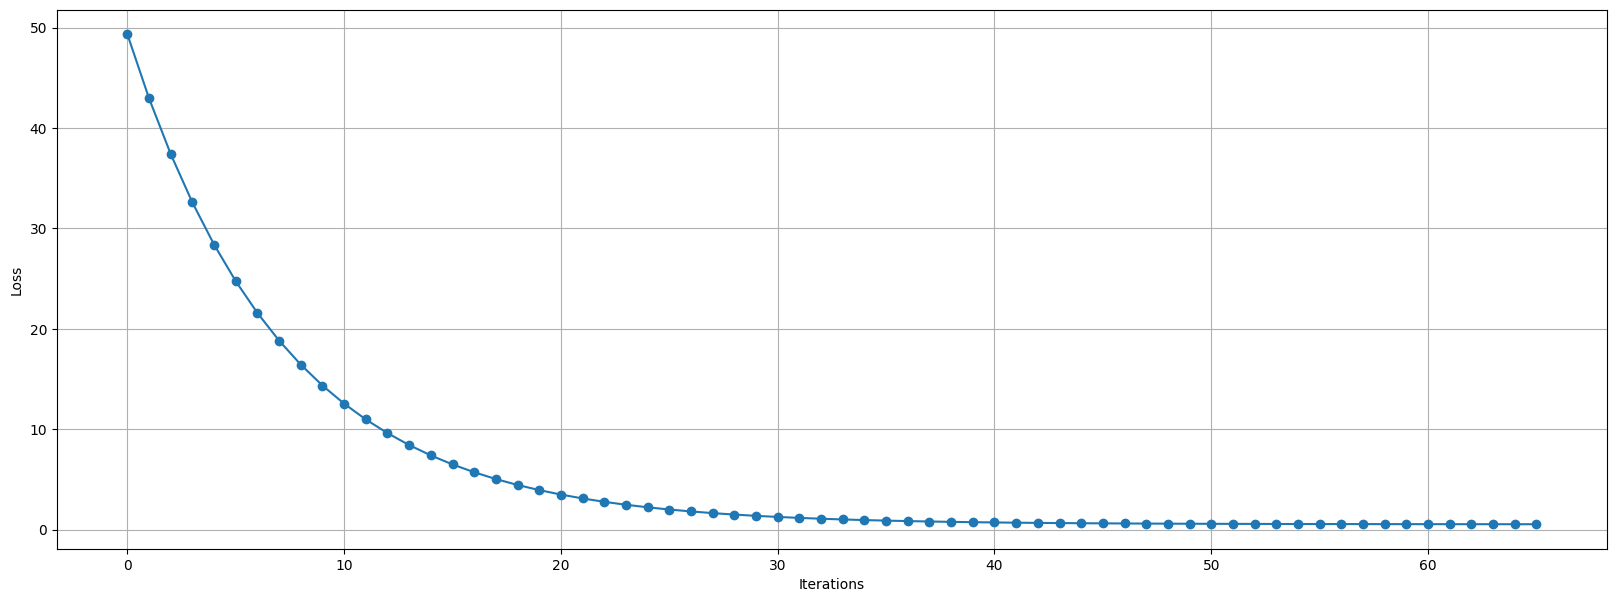

In [10]:
plot_loss(loss)

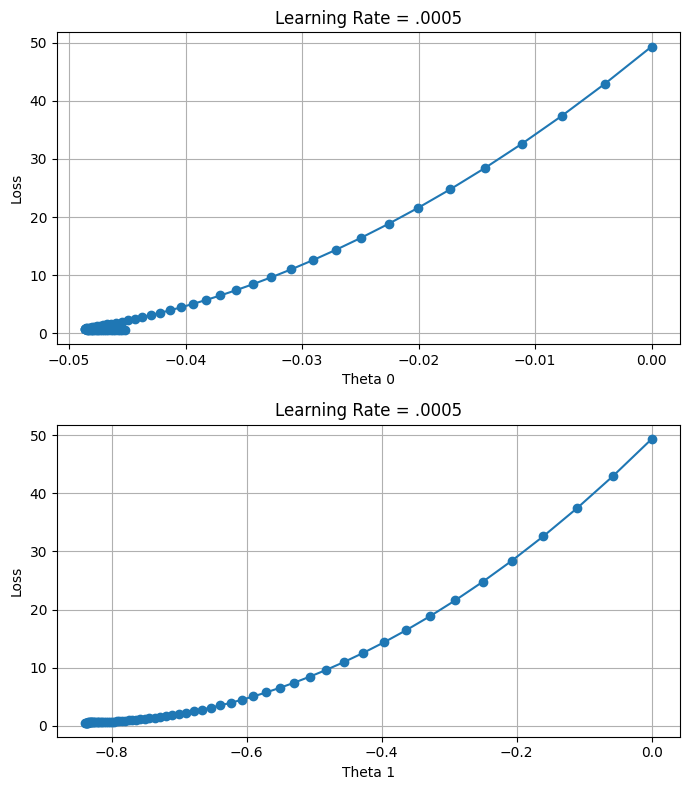

In [11]:
plot_thetas_0_1_vs_loss(thetas_0, thetas_1, loss)

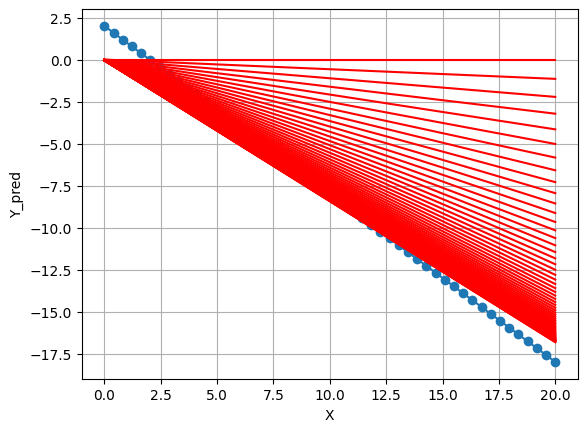

In [12]:
plot_all_reg(X, y, hypos)

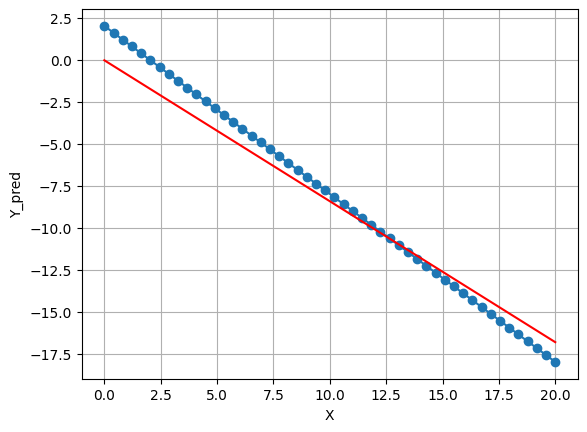

In [13]:
plot_best_reg(X, y, hypos)

### Update your Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

In [14]:
def GD_SingleVar_LR_Mom(X, y, alpha, gamma, max_iter):
    theta_0 = 0                                                     # Initialization
    theta_1 = 0
    mom_0 = 0
    mom_1 = 0
    loss = [1]
    thetas_0 = []
    thetas_1 = []
    hypos = []
    m = len(X)

    for i in range(max_iter):
        print('*' * 20 , f'Iteration {i}', '*' * 20, '\n')
        y_hat = theta_0 + theta_1 * X                               # Predictions
        print(f"h(x):{y_hat}\n")

        err_vec = y_hat - y                                         # Error Vector
        j = (1 / (2 * m)) * np.sum(np.square(err_vec))              # Cost Function
        print(f"Error Vector:\n{err_vec}\n\nj = {j}\n")

        #### Track variables
        loss.append(j)
        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        hypos.append(y_hat)

        d_theta_0 = (1 / m) * np.sum(err_vec * 1)                   # Theta 0 gradient
        d_theta_1 = (1 / m) * np.sum(err_vec * X)                   # Theta 1 gradient
        print(f"d_theta_0 : {d_theta_0}")
        print(f"d_theta_1 : {d_theta_1}\n")


        grad_vec = np.array([d_theta_0, d_theta_1])
        grad_norm = np.linalg.norm(grad_vec)
        print(f"Gradient Vector : {grad_vec}")
        print(f"Gradient Vector Norm : {grad_norm}\n")

        if grad_norm < .001 or np.abs((loss[-2] - loss[-1])) < .001:                                                  # Termination Condition
            print(f"Converged after {i} iteration")
            break

        mom_0 = gamma * mom_0 + alpha * d_theta_0
        mom_1 = gamma * mom_1 + alpha * d_theta_1

        theta_0 = theta_0 - mom_0                       # Theta 0 update
        theta_1 = theta_1 - mom_1                       # Theta 1 update
        print(f"theta_0_new : {theta_0}")
        print(f"theta_1_new : {theta_1}\n")

    loss.pop(0)
    return loss, thetas_0, thetas_1, hypos, theta_0, theta_1

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

In [15]:
loss, thetas_0, thetas_1, hypos, theta_0, theta_1 = GD_SingleVar_LR_Mom(X, y, .0005, .5, 300)

******************** Iteration 0 ******************** 

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

d_theta_0 : 8.0
d_theta_1 : 114.69387755102042

Gradient Vector : [  8.         114.69387755]
Gradient Vector Norm : 114.97254258164628



In [16]:
r2_score(y, theta_0 + theta_1 * X)

0.9687892837396442

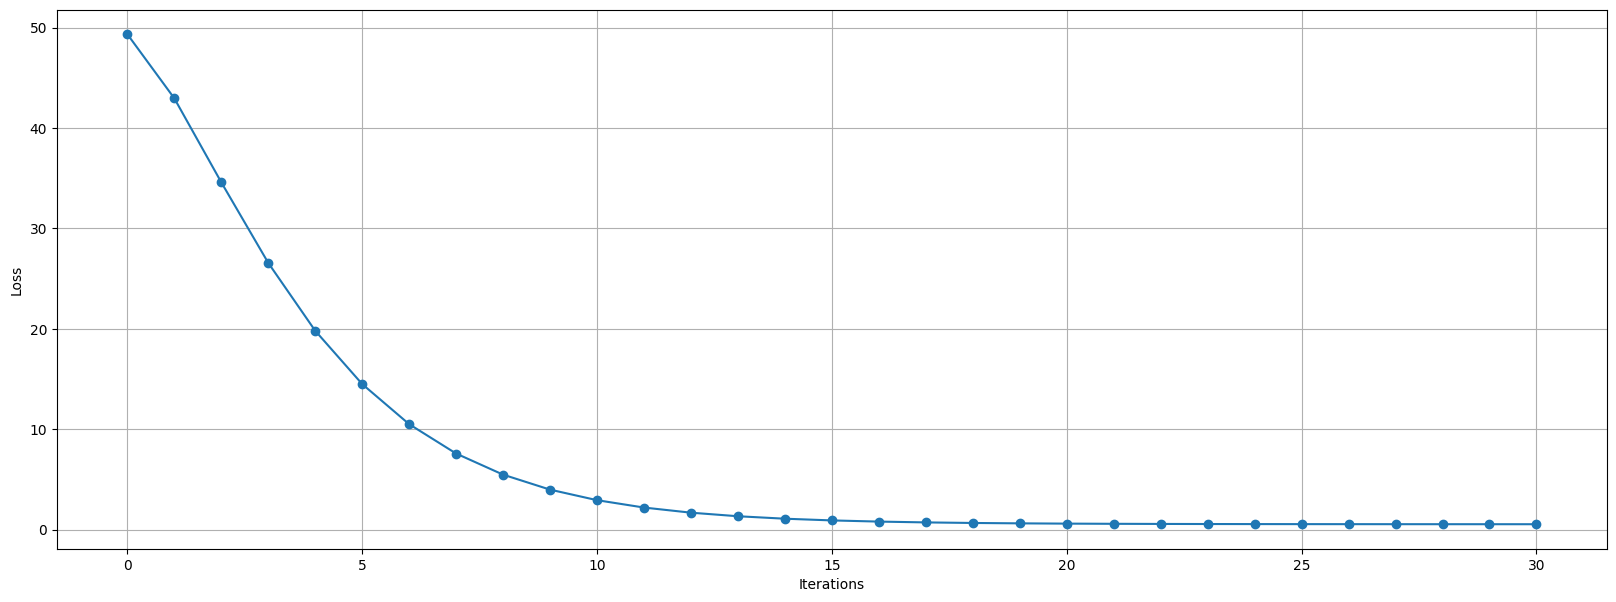

In [17]:
plot_loss(loss)

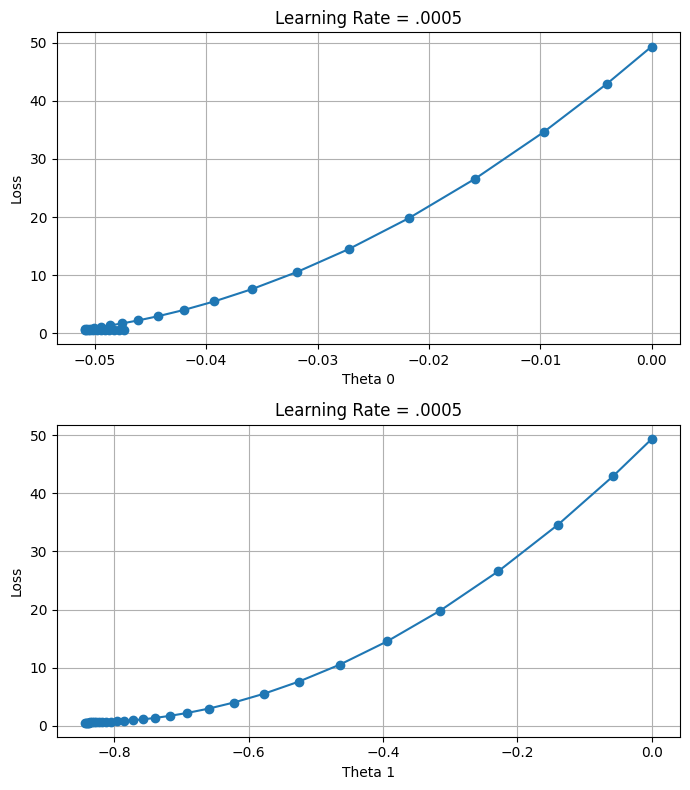

In [18]:
plot_thetas_0_1_vs_loss(thetas_0, thetas_1, loss)

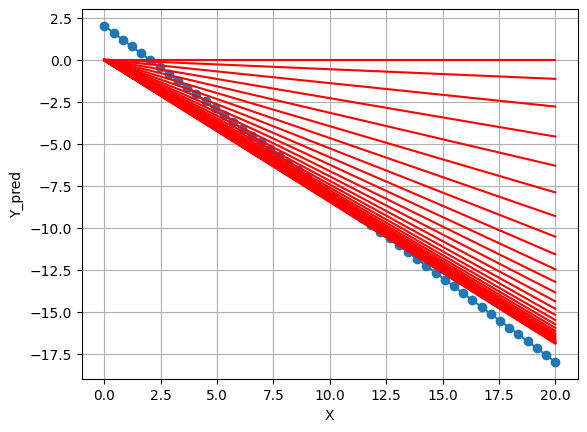

In [19]:
plot_all_reg(X, y, hypos)

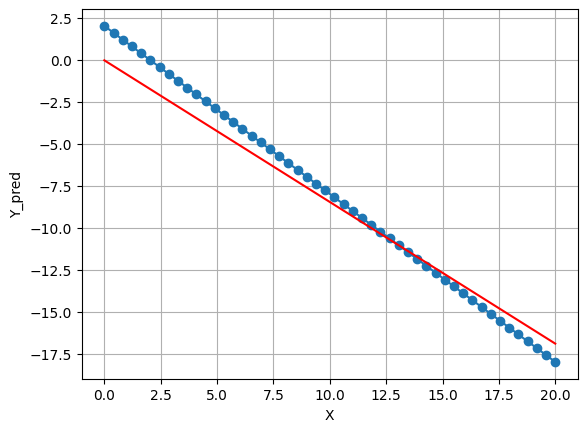

In [20]:
plot_best_reg(X, y, hypos)

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero.
#### Try momentum = 0

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [21]:
loss, thetas_0, thetas_1, hypos, theta_0, theta_1 = GD_SingleVar_LR_Mom(X, y, .0005, .9, 300)

******************** Iteration 0 ******************** 

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

d_theta_0 : 8.0
d_theta_1 : 114.69387755102042

Gradient Vector : [  8.         114.69387755]
Gradient Vector Norm : 114.97254258164628



In [22]:
r2_score(y, theta_0 + theta_1 * X)

0.973589591111118

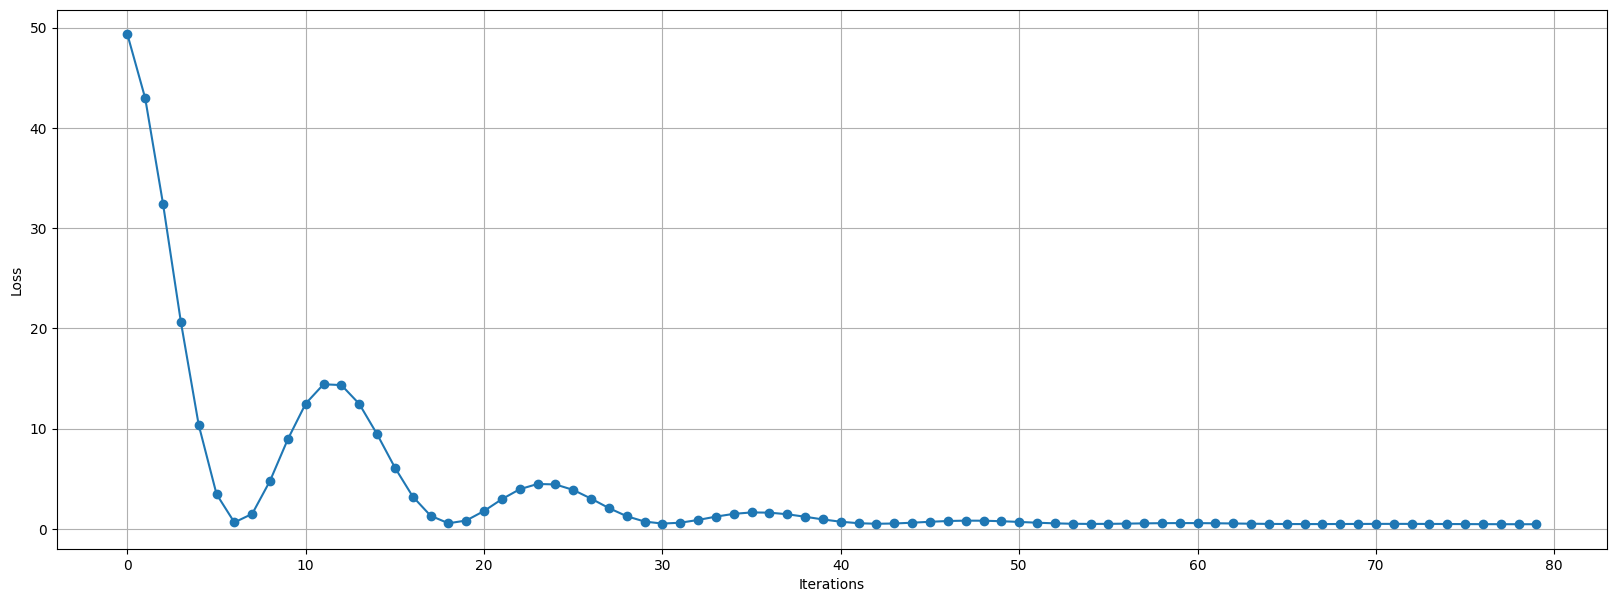

In [23]:
plot_loss(loss)

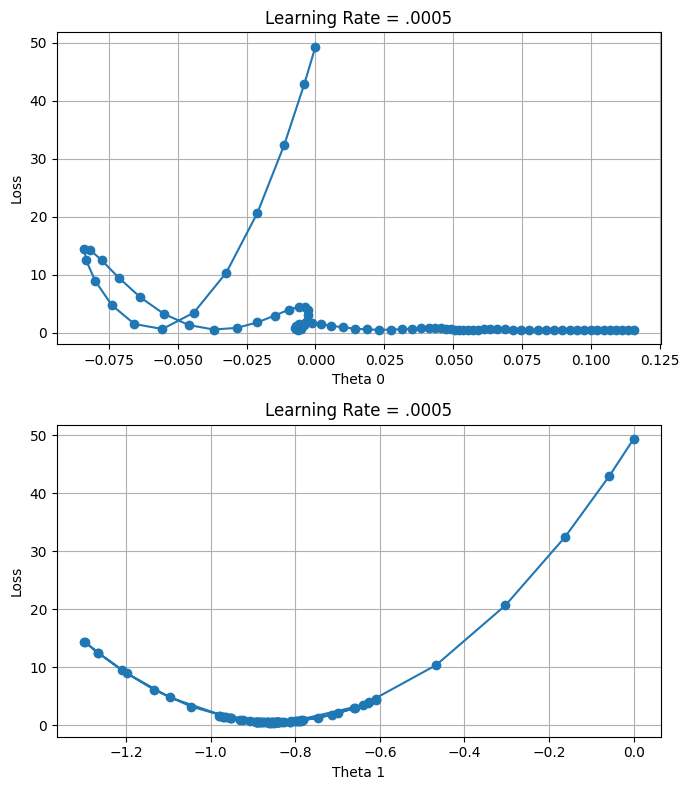

In [24]:
plot_thetas_0_1_vs_loss(thetas_0, thetas_1, loss)

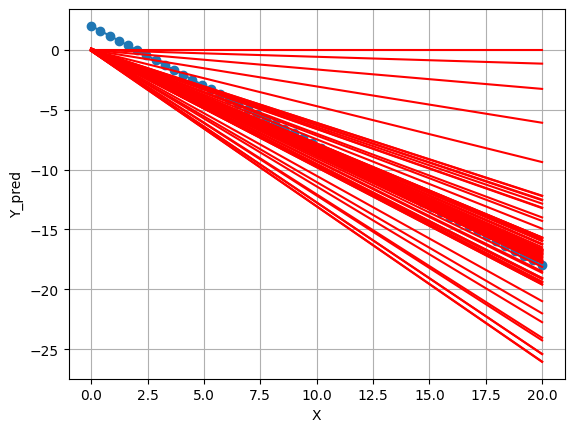

In [25]:
plot_all_reg(X, y, hypos)

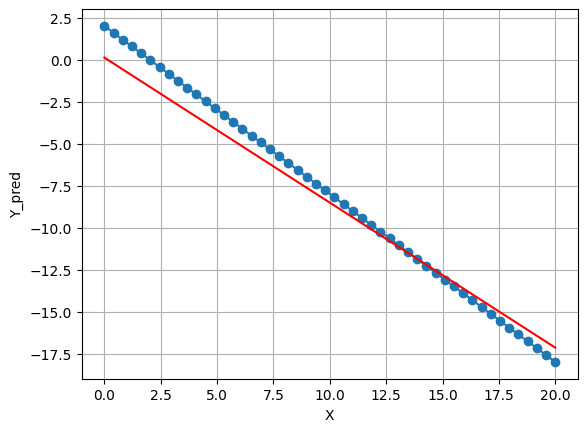

In [26]:
plot_best_reg(X, y, hypos)

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [27]:
loss, thetas_0, thetas_1, hypos, theta_0, theta_1 = GD_SingleVar_LR_Mom(X, y, .0005, .89, 300)

******************** Iteration 0 ******************** 

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

d_theta_0 : 8.0
d_theta_1 : 114.69387755102042

Gradient Vector : [  8.         114.69387755]
Gradient Vector Norm : 114.97254258164628



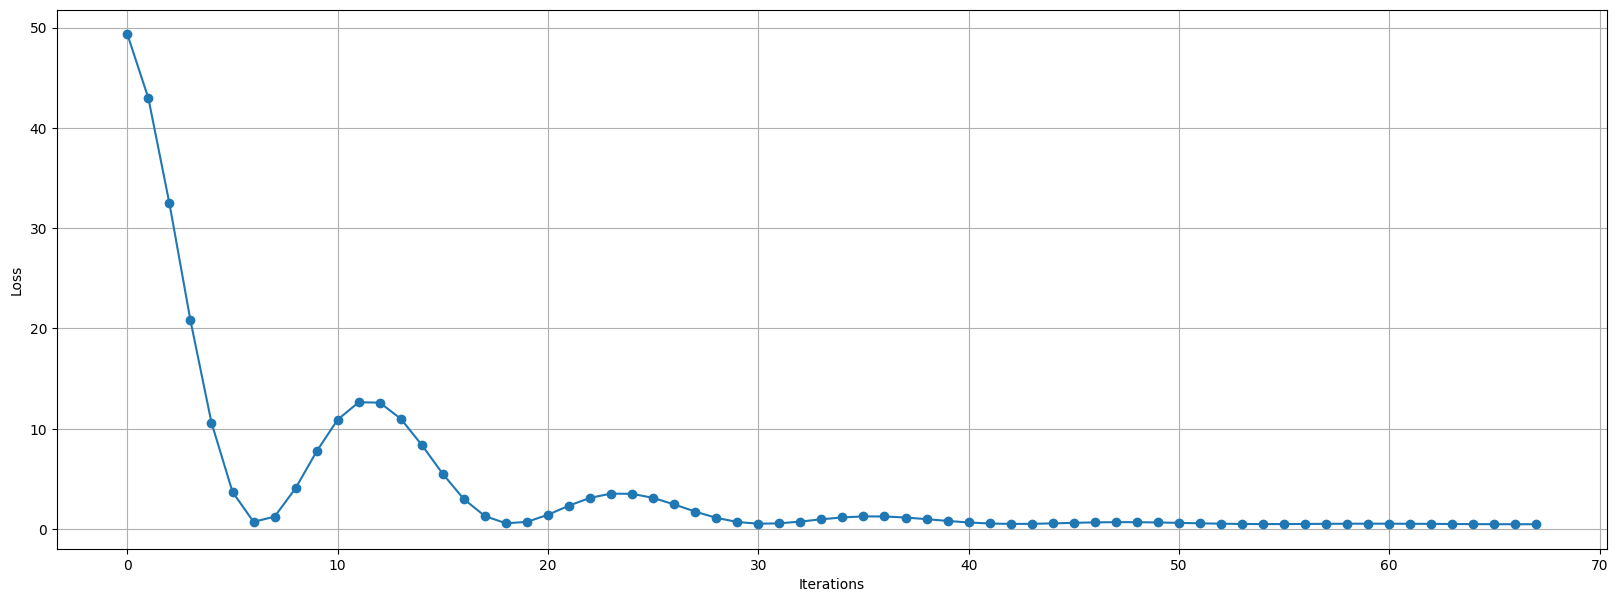

In [28]:
plot_loss(loss)

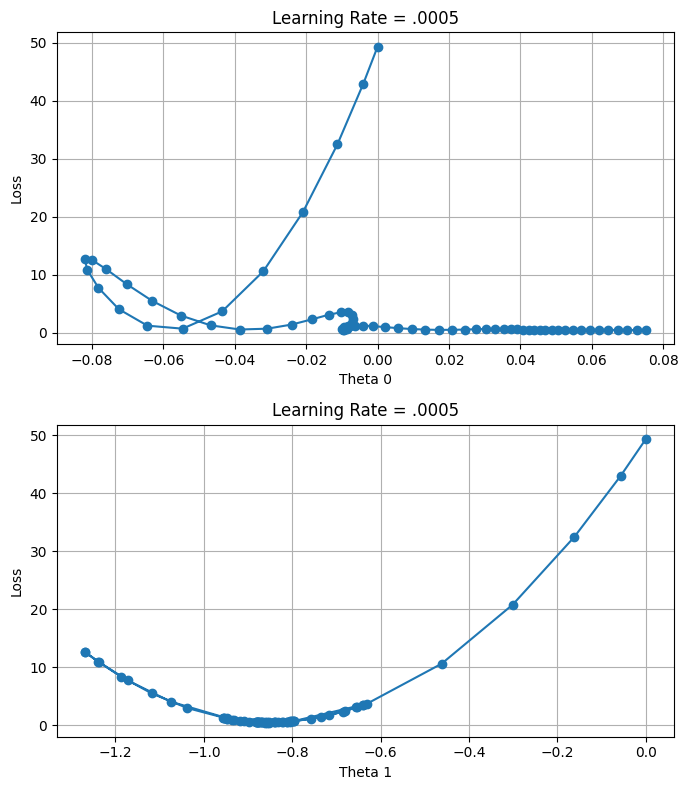

In [29]:
plot_thetas_0_1_vs_loss(thetas_0, thetas_1, loss)

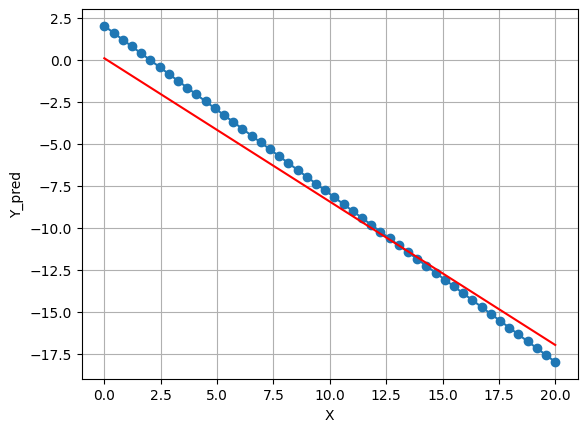

In [30]:
plot_best_reg(X, y, hypos)

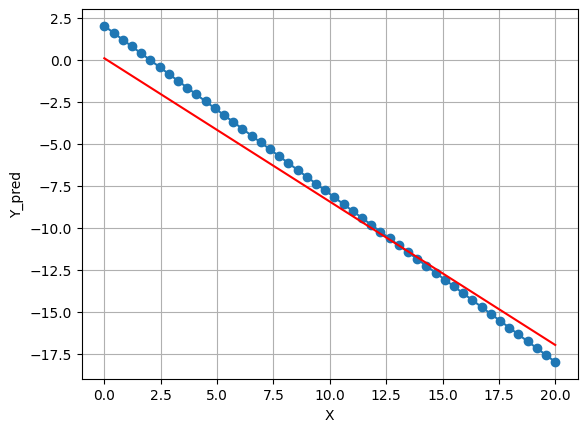

In [31]:
plot_best_reg(X, y, hypos)

### Do not forget:

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero.
#### Try momentum = 0

In [32]:
loss, thetas_0, thetas_1, hypos, theta_0, theta_1 = GD_SingleVar_LR_Mom(X, y, .0005, 0, 300)

******************** Iteration 0 ******************** 

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

d_theta_0 : 8.0
d_theta_1 : 114.69387755102042

Gradient Vector : [  8.         114.69387755]
Gradient Vector Norm : 114.97254258164628



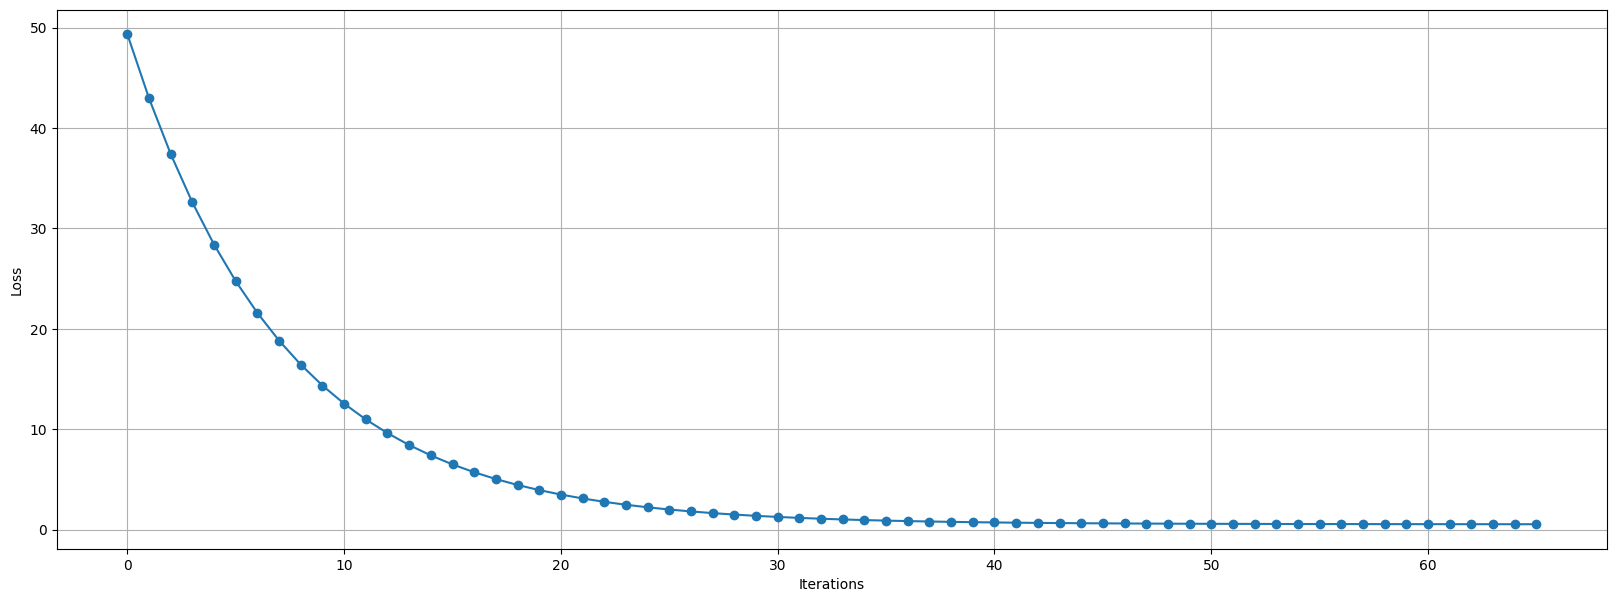

In [33]:
plot_loss(loss)

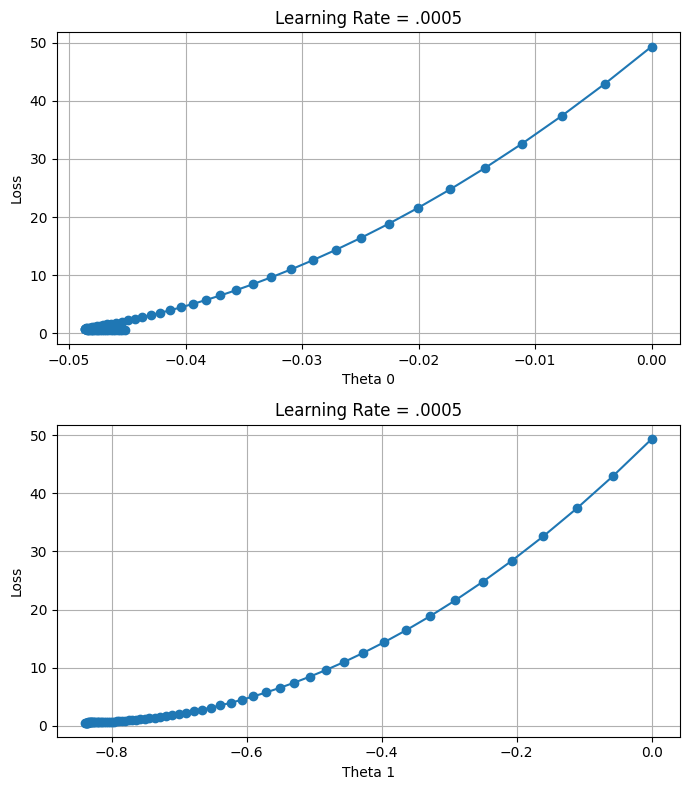

In [34]:
plot_thetas_0_1_vs_loss(thetas_0, thetas_1, loss)

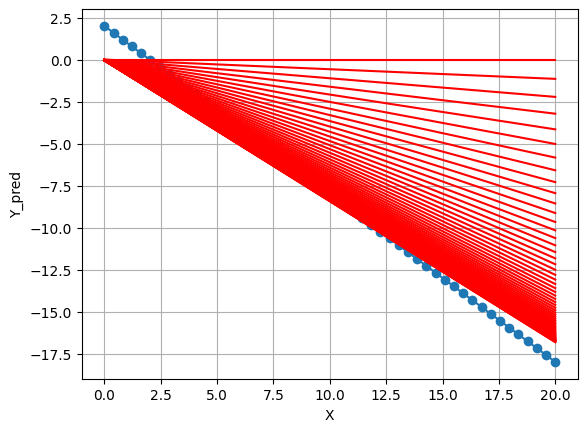

In [35]:
plot_all_reg(X, y, hypos)

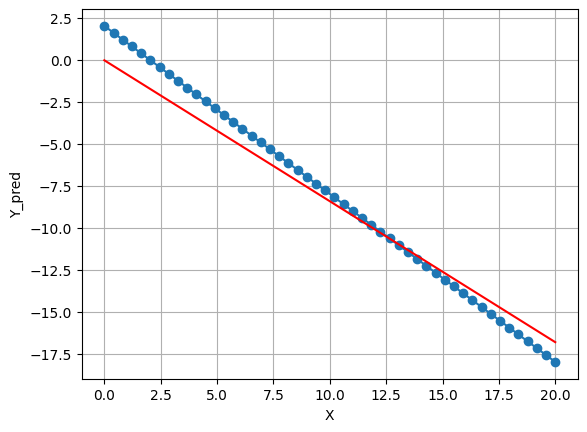

In [36]:
plot_best_reg(X, y, hypos)

### Update your Batch GD for one variable  implementation to be NAG and check your results

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b>
##### h_temp = theta0_temp + theta1_temp * X

In [37]:
def GD_SingleVar_LR_NAG(X, y, alpha, gamma, max_iter):
    theta_0 = 0                                                     # Initialization
    theta_1 = 0
    v_0 = 0
    v_1 = 0
    loss = [1]
    thetas_0 = []
    thetas_1 = []
    hypos = []
    m = len(X)

    for i in range(max_iter):
        print('*' * 20 , f'Iteration {i}', '*' * 20, '\n')
        y_hat = theta_0 + theta_1 * X                               # Predictions
        print(f"h(x):{y_hat}\n")

        err_vec = y_hat - y                                         # Error Vector
        j = (1 / (2 * m)) * np.sum(np.square(err_vec))              # Cost Function
        # print(f"Error Vector:\n{err_vec}\n\nj = {j}\n")

        #### Track variables
        loss.append(j)
        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        hypos.append(y_hat)

        d_theta_0 = (1 / m) * np.sum(err_vec * 1)                   # Theta 0 gradient
        d_theta_1 = (1 / m) * np.sum(err_vec * X)                   # Theta 1 gradient
        # print(f"d_theta_0 : {d_theta_0}")
        # print(f"d_theta_1 : {d_theta_1}\n")


        grad_vec = np.array([d_theta_0, d_theta_1])
        grad_norm = np.linalg.norm(grad_vec)
        # print(f"Gradient Vector : {grad_vec}")
        # print(f"Gradient Vector Norm : {grad_norm}\n")

        if grad_norm < .001 or np.abs((loss[-2] - loss[-1])) < .001:                                                  # Termination Condition
            print(f"Converged after {i} iteration")
            break

        theta_tmp_0  = theta_0 - gamma * v_0
        theta_tmp_1  = theta_1 - gamma * v_1

        h_temp = theta_tmp_0 + theta_tmp_1 * X

        d_theta_tmp_0 = np.sum(h_temp - y) / m
        d_theta_tmp_1 = (np.sum((h_temp - y) * X))/ m


        v_0 = gamma * v_0 + alpha * d_theta_tmp_0
        v_1 = gamma * v_1 + alpha * d_theta_tmp_1

        theta_0 = theta_tmp_0 - alpha * d_theta_tmp_0                               # Theta 0 update
        theta_1 = theta_tmp_1 - alpha * d_theta_tmp_1                               # Theta 1 update

        print(f"theta_0_new : {theta_0}")
        print(f"theta_1_new : {theta_1}\n")

    loss.pop(0)
    return loss, thetas_0, thetas_1, hypos, theta_0, theta_1

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [38]:
loss, thetas_0, thetas_1, hypos, theta_0, theta_1 = GD_SingleVar_LR_NAG(X, y, .0005, .9, 300)

******************** Iteration 0 ******************** 

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

theta_0_new : -0.004
theta_1_new : -0.05734693877551021

******************** Iteration 1 ******************** 

h(x):[-0.004      -0.02740691 -0.05081383 -0.07422074 -0.09762766 -0.12103457
 -0.14444148 -0.1678484  -0.19125531 -0.21466222 -0.23806914 -0.26147605
 -0.28488297 -0.30828988 -0.33169679 -0.35510371 -0.37851062 -0.40191753
 -0.42532445 -0.44873136 -0.47213828 -0.49554519 -0.5189521  -0.54235902
 -0.56576593 -0.58917284 -0.61257976 -0.63598667 -0.65939359 -0.6828005
 -0.70620741 -0.72961433 -0.75302124 -0.77642815 -0.79983507 -0.82324198
 -0.8466489  -0.87005581 -0.89346272 -0.91686964 -0.94027655 -0.96368347
 -0.98709038 -1.01049729 -1.03390421 -1.05731112 -1.08071803 -1.10412495
 -1.12753186 -1.15093878]

theta_0_new : -0.011051404081632655
theta_1_new : -0.158

In [39]:
r2_score(y, theta_0 + theta_1 * X)

0.971103130756324

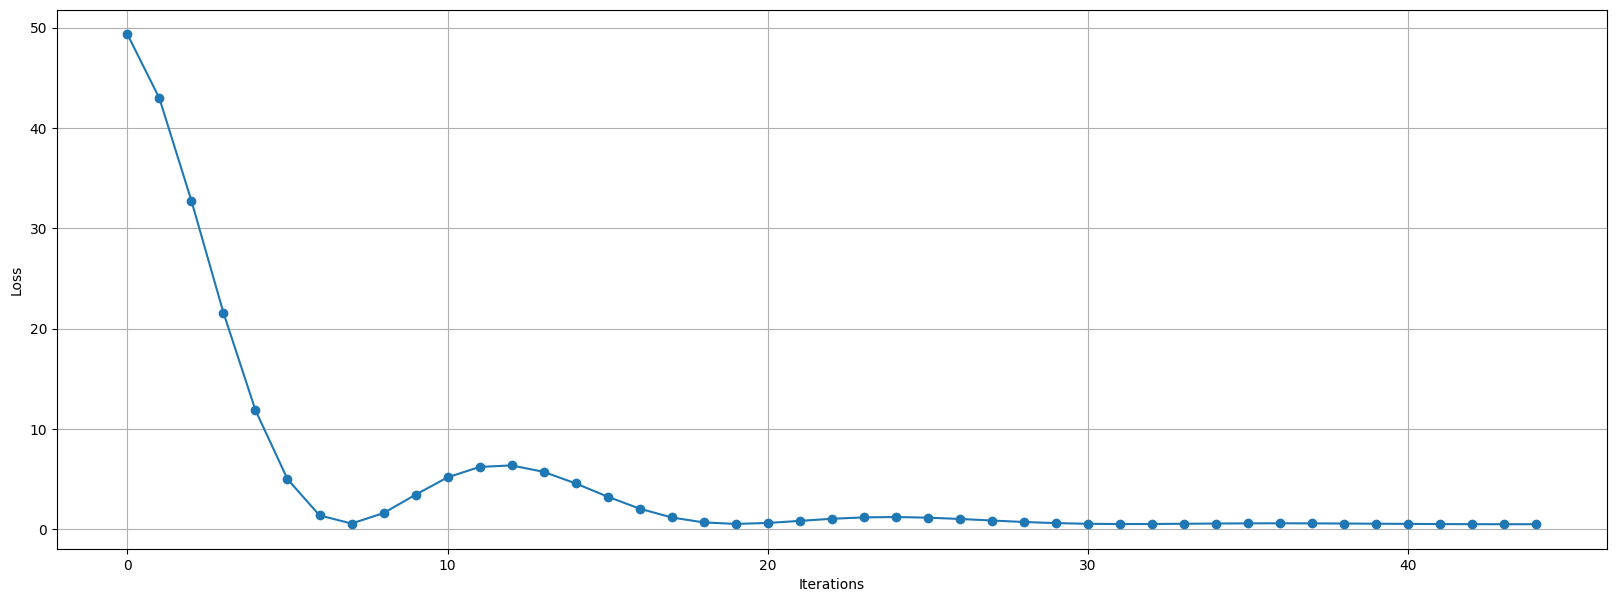

In [40]:
plot_loss(loss)

In [41]:
thetas_1

[0,
 -0.05734693877551021,
 -0.1589300549770929,
 -0.2907541765964131,
 -0.4390296931257452,
 -0.5910731903096034,
 -0.7359882297551218,
 -0.8651155558485113,
 -0.9722593515965543,
 -1.05371026507873,
 -1.1080963556418582,
 -1.1360997487583013,
 -1.1400798005745398,
 -1.123643337488287,
 -1.0911995912931207,
 -1.0475324319619708,
 -0.9974160816008015,
 -0.9452933344854871,
 -0.8950280132854578,
 -0.8497364764932346,
 -0.8116968638858626,
 -0.7823297138892313,
 -0.7622397781236446,
 -0.7513063518161848,
 -0.748808194363303,
 -0.7535690132395693,
 -0.7641103495083096,
 -0.7788003203177618,
 -0.7959888124093905,
 -0.8141221520605113,
 -0.831832789262536,
 -0.8480019441295485,
 -0.8617953247705985,
 -0.8726738318550231,
 -0.8803825507286236,
 -0.8849222710233836,
 -0.8865082745207669,
 -0.8855212312015897,
 -0.8824547988716395,
 -0.8778640053720581,
 -0.8723177828869746,
 -0.8663582003757873,
 -0.8604680767954721,
 -0.8550478194233236,
 -0.8504015709902862]

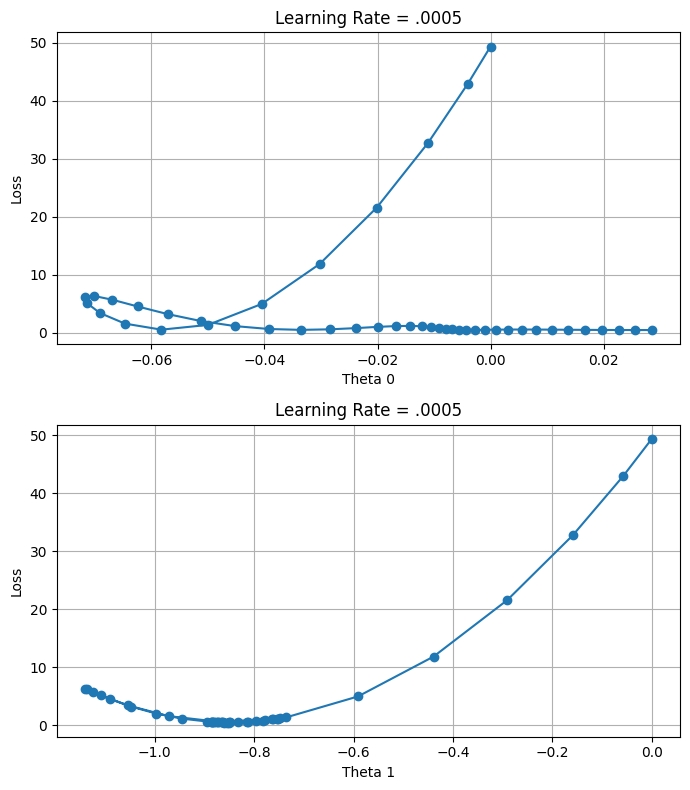

In [42]:
plot_thetas_0_1_vs_loss(thetas_0, thetas_1, loss)

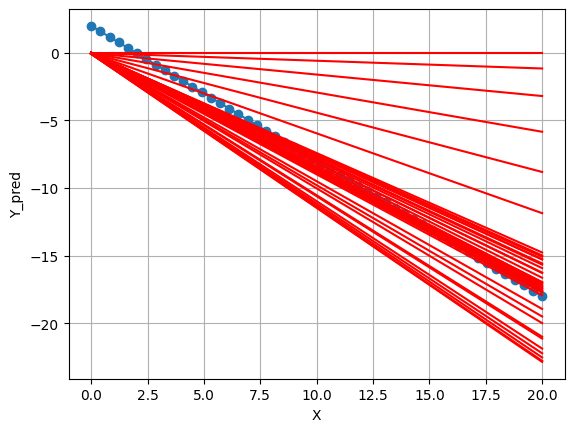

In [43]:
plot_all_reg(X, y, hypos)

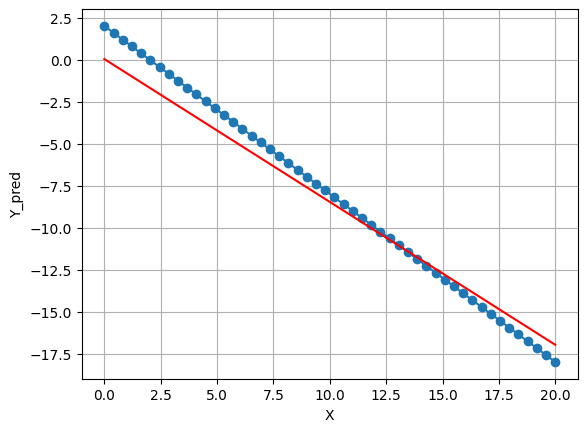

In [44]:
plot_best_reg(X, y, hypos)

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [45]:
loss, thetas_0, thetas_1, hypos, theta_0, theta_1 = GD_SingleVar_LR_NAG(X, y, .0005, .89, 300)

******************** Iteration 0 ******************** 

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

theta_0_new : -0.004
theta_1_new : -0.05734693877551021

******************** Iteration 1 ******************** 

h(x):[-0.004      -0.02740691 -0.05081383 -0.07422074 -0.09762766 -0.12103457
 -0.14444148 -0.1678484  -0.19125531 -0.21466222 -0.23806914 -0.26147605
 -0.28488297 -0.30828988 -0.33169679 -0.35510371 -0.37851062 -0.40191753
 -0.42532445 -0.44873136 -0.47213828 -0.49554519 -0.5189521  -0.54235902
 -0.56576593 -0.58917284 -0.61257976 -0.63598667 -0.65939359 -0.6828005
 -0.70620741 -0.72961433 -0.75302124 -0.77642815 -0.79983507 -0.82324198
 -0.8466489  -0.87005581 -0.89346272 -0.91686964 -0.94027655 -0.96368347
 -0.98709038 -1.01049729 -1.03390421 -1.05731112 -1.08071803 -1.10412495
 -1.12753186 -1.15093878]

theta_0_new : -0.011014291428571429
theta_1_new : -0.158

In [46]:
r2_score(y, theta_0 + theta_1 * X)

0.9699718983158406

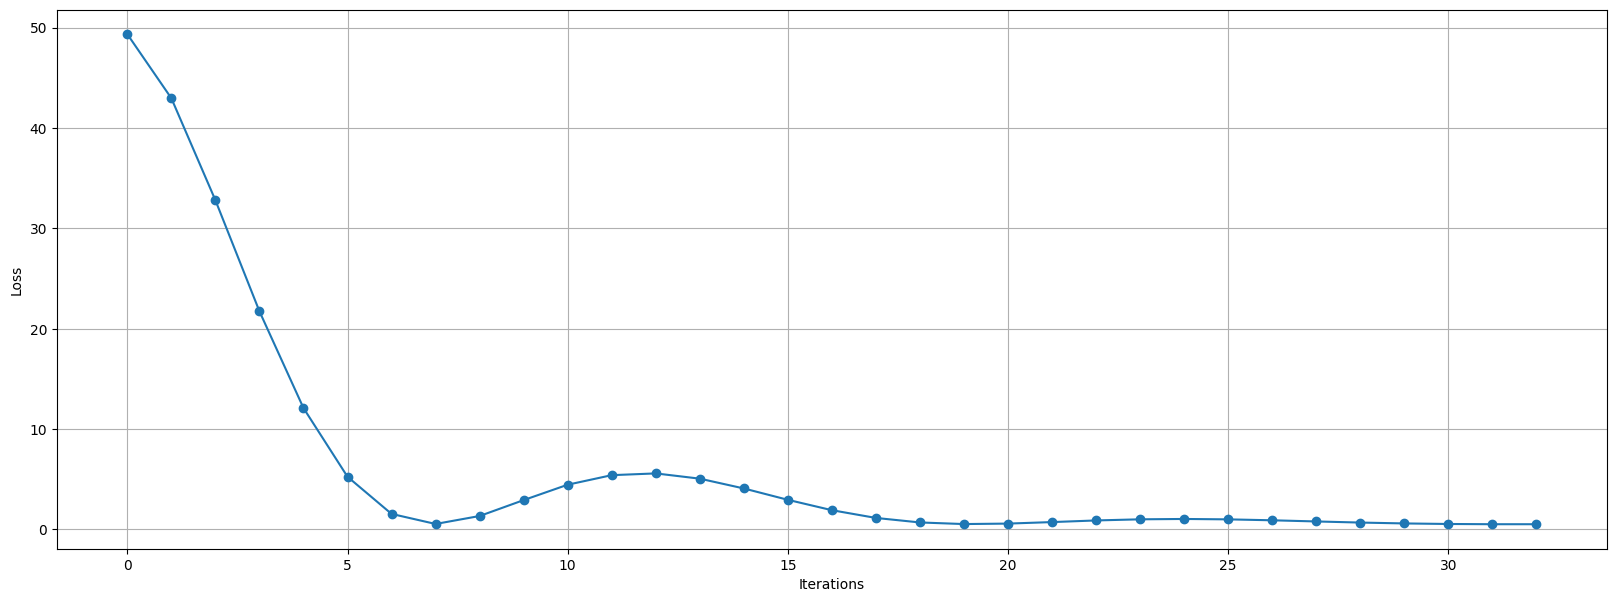

In [47]:
plot_loss(loss)

In [48]:
len(thetas_0), len(thetas_1), len(loss)

(33, 33, 33)

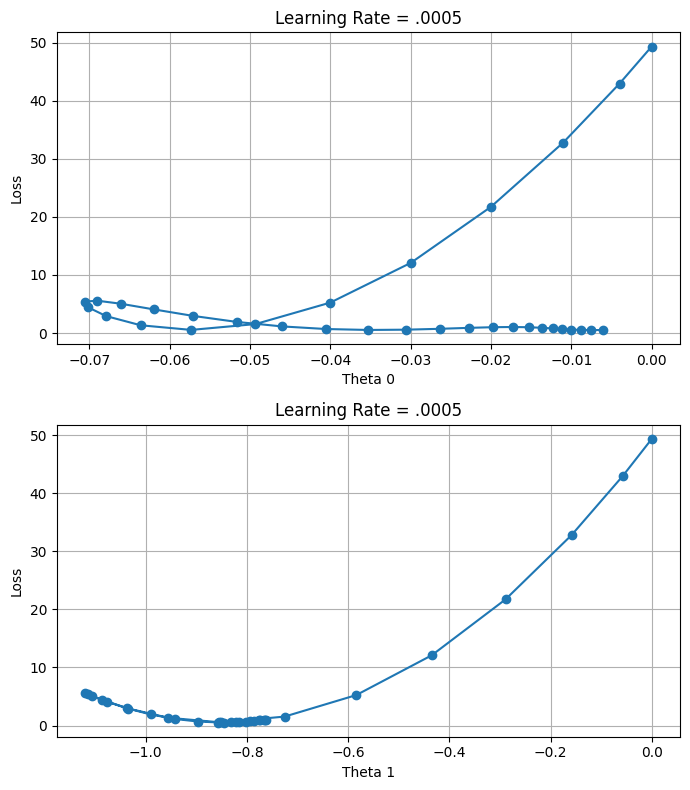

In [49]:
plot_thetas_0_1_vs_loss(thetas_0, thetas_1, loss)

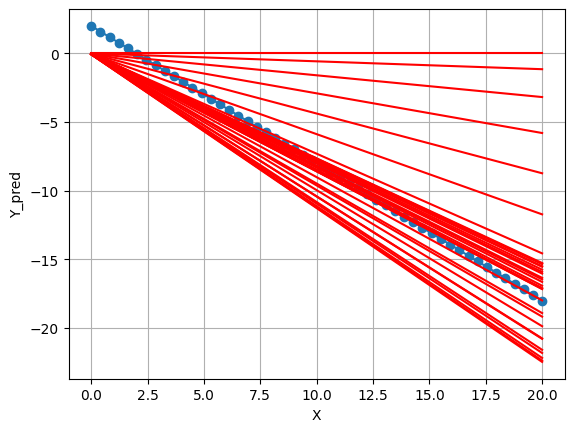

In [50]:
plot_all_reg(X, y, hypos)

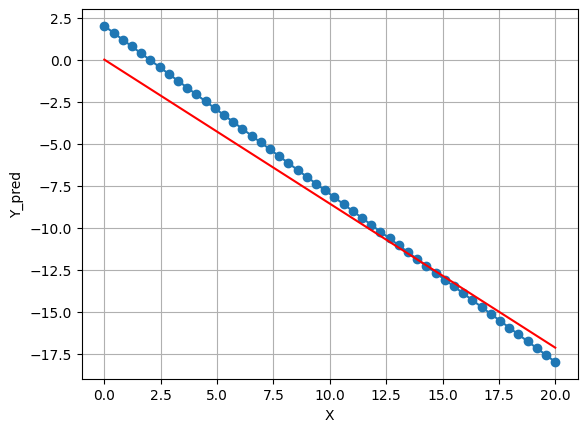

In [51]:
plot_best_reg(X, y, hypos)